## Breast Cancer - Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
proteomes = pd.read_csv( 'data/77_cancer_proteomes_CPTAC_itraq.csv')
clinical = pd.read_csv( 'data/clinical_data_breast_cancer.csv')
proteins = pd.read_csv( 'data/PAM50_proteins.csv')

In [3]:
proteins.head(3)

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4


In [4]:
proteins.nunique(axis=0).sort_values()

Species              1
GeneSymbol          50
Gene Name           50
RefSeqProteinID    100
dtype: int64

In [5]:
proteins = proteins.drop(['Species'], axis=1)

In [6]:
proteins.head(3)

,GeneSymbol,RefSeqProteinID,Gene Name
0,MIA,NP_006524,melanoma inhibitory activity
1,FGFR4,NP_002002,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,fibroblast growth factor receptor 4


In [7]:
for col in clinical:
    print(f'{col = }')
    print(clinical[col].unique())
    

col = 'Complete TCGA ID'
['TCGA-A2-A0T2' 'TCGA-A2-A0CM' 'TCGA-BH-A18V' 'TCGA-BH-A18Q'
 'TCGA-BH-A0E0' 'TCGA-A7-A0CE' 'TCGA-D8-A142' 'TCGA-A2-A0D0'
 'TCGA-AO-A0J6' 'TCGA-A2-A0YM' 'TCGA-A2-A0D2' 'TCGA-A2-A0SX'
 'TCGA-AO-A0JL' 'TCGA-AO-A12F' 'TCGA-AN-A0AL' 'TCGA-AN-A0FL'
 'TCGA-AR-A0U4' 'TCGA-AR-A1AQ' 'TCGA-BH-A0AV' 'TCGA-C8-A12V'
 'TCGA-C8-A131' 'TCGA-C8-A134' 'TCGA-E2-A150' 'TCGA-E2-A158'
 'TCGA-E2-A159' 'TCGA-BH-A18R' 'TCGA-A2-A0T1' 'TCGA-BH-A0EE'
 'TCGA-A2-A0D1' 'TCGA-AO-A12D' 'TCGA-AO-A0JE' 'TCGA-A2-A0EQ'
 'TCGA-A8-A076' 'TCGA-A8-A09G' 'TCGA-AR-A0TX' 'TCGA-C8-A12L'
 'TCGA-C8-A12P' 'TCGA-C8-A12Q' 'TCGA-C8-A12T' 'TCGA-C8-A12Z'
 'TCGA-C8-A130' 'TCGA-C8-A135' 'TCGA-C8-A138' 'TCGA-AR-A0TR'
 'TCGA-BH-A18N' 'TCGA-BH-A0HK' 'TCGA-A7-A0CD' 'TCGA-BH-A0HP'
 'TCGA-A2-A0YI' 'TCGA-A2-A0YL' 'TCGA-A2-A0YF' 'TCGA-BH-A0E1'
 'TCGA-A2-A0T6' 'TCGA-A2-A0T7' 'TCGA-A2-A0YD' 'TCGA-A2-A0EV'
 'TCGA-A2-A0YC' 'TCGA-AO-A0J9' 'TCGA-BH-A0BV' 'TCGA-AO-A12E'
 'TCGA-AO-A126' 'TCGA-A2-A0EX' 'TCGA-AO-A0JJ' 'TCGA-A8-A08Z'

In [8]:
clinical = clinical.drop(['Node-Coded', 'Tumor--T1 Coded', 'Metastasis', 'OS Time', 'OS event', 'SigClust Unsupervised mRNA',
                         'SigClust Intrinsic mRNA', 'miRNA Clusters', 'methylation Clusters','RPPA Clusters', 'CN Clusters',
                         'Integrated Clusters (with PAM50)', 'Integrated Clusters (no exp)', 'Integrated Clusters (unsup exp)'],
                         axis=1) # dropped some clusters that were already made idk if correctly
clinical['Gender'] = clinical['Gender'].replace({'FEMALE': 0, 'MALE': 1})
clinical['Survival Data Form'] = clinical['Survival Data Form'].replace({'enrollment': 0, 'followup': 1})
clinical['Vital Status'] = clinical['Vital Status'].replace({'DECEASED': 0, 'LIVING': 1})
clinical = clinical.rename(columns={'Age at Initial Pathologic Diagnosis': 'diagnosis_age', 
                                    'Metastasis-Coded' : 'spread_other_parts',
                                   'PAM50 mRNA' : 'cancer_type',
                                   'Converted Stage' : 'converted_stage',
                                    'Tumor': 'tumor_size',
                                   'Node': 'spread_lymph_nodes', 
                                   'Complete TCGA ID': 'Complete.TCGA.ID', 
                                   'AJCC Stage' : 'AJCC_stage',
                                   'Converted Stage': 'converted_stage', 
                                   'Gender': 'gender'})
clinical['PR Status'] = clinical['PR Status'].replace({'Negative': 0, 'Positive': 1})
clinical['tumor_size'] = clinical['tumor_size'].replace({'T4': 4, 'T1': 1, 'T2':2, 'T3':3})
clinical['spread_lymph_nodes'] = clinical['spread_lymph_nodes'].replace({'N0': 0, 'N1': 1, 'N2':2, 'N3':3})
clinical['spread_other_parts'] = clinical['spread_other_parts'].replace({'Negative': 0, 'Positive': 1})

def restructure_stage(stage):
    return stage[6:]

clinical['AJCC_stage'] = clinical['AJCC_stage'].apply(restructure_stage)

def restructure_con_stage(stage):
    if stage == 'No_Conversion':
        return 0
    else:
        return stage[6:]
    
clinical['converted_stage'] = clinical['converted_stage'].apply(restructure_con_stage)

In [9]:
clinical

,Complete.TCGA.ID,gender,diagnosis_age,ER Status,PR Status,HER2 Final Status,tumor_size,spread_lymph_nodes,spread_other_parts,AJCC_stage,converted_stage,Survival Data Form,Vital Status,Days to Date of Last Contact,Days to date of Death,cancer_type
0,TCGA-A2-A0T2,0,66,Negative,0,Negative,3,3,1,IV,0,1,0,240,240.0,Basal-like
1,TCGA-A2-A0CM,0,40,Negative,0,Negative,2,0,0,IIA,IIA,1,0,754,754.0,Basal-like
2,TCGA-BH-A18V,0,48,Negative,0,Negative,2,1,0,IIB,0,0,0,1555,1555.0,Basal-like
3,TCGA-BH-A18Q,0,56,Negative,0,Negative,2,1,0,IIB,0,0,0,1692,1692.0,Basal-like
4,TCGA-BH-A0E0,0,38,Negative,0,Negative,3,3,0,IIIC,0,1,1,133,NaN,Basal-like
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,0,48,Positive,0,Positive,2,1,0,IIB,IIB,0,1,1305,NaN,Luminal B
101,TCGA-BH-A0DD,1,58,Positive,1,Positive,2,1,0,IIB,IIB,0,1,1393,NaN,Luminal B
102,TCGA-C8-A12U,0,46,Positive,1,Negative,2,1,0,IB,IIB,0,1,0,NaN,Luminal B
103,TCGA-C8-A12W,0,49,Positive,1,Negative,4,1,0,IIIB,IIIB,0,1,0,NaN,Luminal B


<AxesSubplot:>

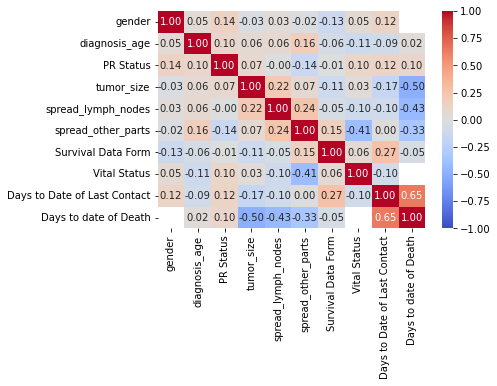

In [48]:
sns.heatmap(clinical.corr(), cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)

In [49]:
proteomes.head(3)

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747


In [50]:
# reformating columnnames in proteomes df to fit column Complete TCGA ID in clinical df
n = proteomes['RefSeq_accession_number']
proteomes = proteomes.iloc[:, 3:86].transpose()
proteomes.columns = n
proteomes.insert(0, 'Complete.TCGA.ID', proteomes.index)
proteomes = proteomes.reset_index(drop=True)

def restructure(proteome):
    x = proteome[3:7]
    y = proteome[0:2]
    return "TCGA" + "-" + y + "-" + x

proteomes['Complete.TCGA.ID'] = proteomes['Complete.TCGA.ID'].apply(restructure)

RefSeq_accession_number
NP_065785           0.759036
NP_620138           0.759036
NP_003836           0.746988
NP_001139020        0.746988
NP_001181887        0.746988
                      ...   
NP_001121188        0.000000
NP_006796           0.000000
NP_001139443        0.000000
NP_057390           0.000000
Complete.TCGA.ID    0.000000
Length: 12554, dtype: float64


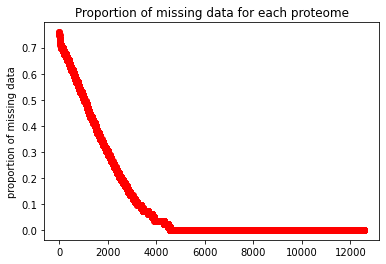

In [51]:
na_counts = proteomes.isna().sum() / len(proteomes)
print(na_counts.sort_values(ascending=False))

plt.plot(na_counts.sort_values(ascending=False).values, color='red', linestyle='-', marker='o')
plt.ylabel("proportion of missing data")
plt.title("Proportion of missing data for each proteome")
plt.show()

In [52]:
count = len(na_counts[na_counts > 0.2])
count
# 2.5k proteomes have more than 20% of missing values 
# from 12k proteomes 2.5k is not a great loss so we can delete them 
# the rest will be replaced with mean for each column

2533

In [53]:
proteomes = proteomes.loc[:, (proteomes.isna().sum() / len(proteomes) < 0.2)]

In [54]:
num_cols = proteomes.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
proteomes[num_cols] = imputer.fit_transform(proteomes[num_cols])

In [55]:
proteomes

RefSeq_accession_number,Complete.TCGA.ID,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,...,NP_002460,NP_001092808,NP_000610,NP_699178,NP_006140,NP_068835,NP_612382,NP_848561,NP_665813,NP_001193600
0,TCGA-AO-A12D,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,...,1.096131,1.259953,-2.472722,-0.294445,0.660707,0.547520,2.936264,-0.100145,0.840875,-1.072555
1,TCGA-C8-A131,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,...,0.666960,0.561715,-2.472722,1.205328,0.660707,0.274316,-0.324771,0.007156,1.468441,-1.072555
2,TCGA-AO-A12B,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,...,-1.427526,-1.571643,-2.472722,-2.580459,0.660707,4.023963,-3.012809,-0.593313,-0.837202,-1.072555
3,TCGA-BH-A18Q,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,...,0.097702,0.275630,-9.750480,1.292626,-1.554294,-0.002037,-4.240636,-2.598053,0.331200,0.048144
4,TCGA-C8-A130,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,...,0.097702,-0.090636,0.745731,-0.933562,2.753011,1.165554,-2.409503,0.598137,0.331200,1.457462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,TCGA-BH-A0C7,-0.552212,-0.547749,-0.552212,-0.552212,-0.556675,-0.547749,-0.552212,-0.552212,0.679466,...,-5.724365,0.243330,-6.186244,-2.928546,-3.946019,0.097491,-1.475970,-0.400998,-2.399728,-1.072555
79,TCGA-A2-A0SX,-0.398560,-0.392601,-0.392601,-0.392601,-0.395581,-0.392601,-0.392601,-0.392601,-2.504862,...,0.501162,0.243330,-1.480013,-0.711377,3.674021,0.097491,-2.591259,-0.400998,-1.214864,-1.072555
80,TCGA-26-d3f-,0.598585,0.606697,0.603993,0.603993,0.603993,0.606697,0.603993,0.603993,-0.602132,...,-0.429056,0.368718,-5.048028,-0.915833,3.584150,-2.865645,-0.759880,-0.400998,0.331200,-2.162522
81,TCGA-bl-db9-,-0.191285,-0.183918,-0.186022,-0.186022,-0.167079,-0.183918,-0.186022,-0.186022,-0.340726,...,-2.858083,-2.257159,-4.890281,-0.167079,-1.469959,-1.232115,-0.759880,-0.400998,0.331200,-4.357763


In [56]:
data = pd.merge(clinical, proteomes, on='Complete.TCGA.ID', how='inner')

In [57]:
data.head()

,Complete.TCGA.ID,gender,diagnosis_age,ER Status,PR Status,HER2 Final Status,tumor_size,spread_lymph_nodes,spread_other_parts,AJCC_stage,...,NP_002460,NP_001092808,NP_000610,NP_699178,NP_006140,NP_068835,NP_612382,NP_848561,NP_665813,NP_001193600
0,TCGA-A2-A0CM,0,40,Negative,0,Negative,2,0,0,IIA,...,0.097702,1.212390,-0.381916,1.557701,3.335683,-0.910903,-0.954985,-0.841106,-1.101926,-1.072555
1,TCGA-BH-A18Q,0,56,Negative,0,Negative,2,1,0,IIB,...,0.097702,0.275630,-9.750480,1.292626,-1.554294,-0.002037,-4.240636,-2.598053,0.331200,0.048144
2,TCGA-A7-A0CE,0,57,Negative,0,Negative,2,0,0,IIA,...,-0.154193,0.704317,-2.472722,1.111478,0.133029,0.524408,-3.894392,-1.239956,1.401856,0.644347
3,TCGA-D8-A142,0,74,Negative,0,Negative,3,0,0,IIB,...,1.514576,0.957906,-6.539066,3.195430,1.688083,1.474814,-0.354245,-1.138644,1.424207,-5.107629
4,TCGA-AO-A0J6,0,61,Negative,0,Negative,2,0,0,IIA,...,-1.780255,-0.905087,-3.059128,-0.241654,4.232992,-2.881272,1.000519,-0.577605,0.413310,-1.043420


In [58]:
# idk if columns 'Days to Date of Last Contact', 'Days to date of Death' are influencial... maybe can be dropped or categorized and ohe

### One Hot Encoding

In [59]:
def change_age(age):
    if age < 40:
        return "young"
    elif age < 60:
        return "middle" 
    else:
        return "elderly"

data.diagnosis_age = data.diagnosis_age.apply(change_age)
data.diagnosis_age.value_counts()

elderly    39
middle     36
young       5
Name: diagnosis_age, dtype: int64

In [60]:
data.head()

,Complete.TCGA.ID,gender,diagnosis_age,ER Status,PR Status,HER2 Final Status,tumor_size,spread_lymph_nodes,spread_other_parts,AJCC_stage,...,NP_002460,NP_001092808,NP_000610,NP_699178,NP_006140,NP_068835,NP_612382,NP_848561,NP_665813,NP_001193600
0,TCGA-A2-A0CM,0,middle,Negative,0,Negative,2,0,0,IIA,...,0.097702,1.212390,-0.381916,1.557701,3.335683,-0.910903,-0.954985,-0.841106,-1.101926,-1.072555
1,TCGA-BH-A18Q,0,middle,Negative,0,Negative,2,1,0,IIB,...,0.097702,0.275630,-9.750480,1.292626,-1.554294,-0.002037,-4.240636,-2.598053,0.331200,0.048144
2,TCGA-A7-A0CE,0,middle,Negative,0,Negative,2,0,0,IIA,...,-0.154193,0.704317,-2.472722,1.111478,0.133029,0.524408,-3.894392,-1.239956,1.401856,0.644347
3,TCGA-D8-A142,0,elderly,Negative,0,Negative,3,0,0,IIB,...,1.514576,0.957906,-6.539066,3.195430,1.688083,1.474814,-0.354245,-1.138644,1.424207,-5.107629
4,TCGA-AO-A0J6,0,elderly,Negative,0,Negative,2,0,0,IIA,...,-1.780255,-0.905087,-3.059128,-0.241654,4.232992,-2.881272,1.000519,-0.577605,0.413310,-1.043420


In [61]:
data_ohe = pd.get_dummies(data, columns=["diagnosis_age", 'ER Status', "PR Status", 'HER2 Final Status', "tumor_size", 'spread_lymph_nodes', 'AJCC_stage', 'converted_stage', 'cancer_type'])

In [62]:
data_ohe.head(3)

,Complete.TCGA.ID,gender,spread_other_parts,Survival Data Form,Vital Status,Days to Date of Last Contact,Days to date of Death,NP_958782,NP_958785,NP_958786,...,converted_stage_I,converted_stage_IIA,converted_stage_IIB,converted_stage_IIIA,converted_stage_IIIB,converted_stage_IIIC,cancer_type_Basal-like,cancer_type_HER2-enriched,cancer_type_Luminal A,cancer_type_Luminal B
0,TCGA-A2-A0CM,0,0,1,0,754,754.0,0.683404,0.694424,0.698098,...,0,1,0,0,0,0,1,0,0,0
1,TCGA-BH-A18Q,0,0,0,0,1692,1692.0,0.195341,0.215413,0.215413,...,0,0,0,0,0,0,1,0,0,0
2,TCGA-A7-A0CE,0,0,1,1,309,NaN,-1.123173,-1.123173,-1.116861,...,0,1,0,0,0,0,1,0,0,0
